In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 4000
CHANNELS=3
EPOCHS=100

In [5]:
IMAGE_SIZE = 256  # Resize to 224x224 (commonly used for CNNs like ResNet, VGG, etc.)
BATCH_SIZE = 32   # Example batch size

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Original Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resizing images
    batch_size=BATCH_SIZE
)


Found 656 files belonging to 4 classes.


In [6]:
class_names=dataset.class_names
class_names


['Bacterial spot rot', 'Black Rot', 'Downy Mildew', 'No disease']

(32, 256, 256, 3)
[1 1 1 0 1 3 0 2 0 0 3 2 3 0 0 2 0 1 0 3 0 3 2 2 2 2 0 3 3 1 3 1]


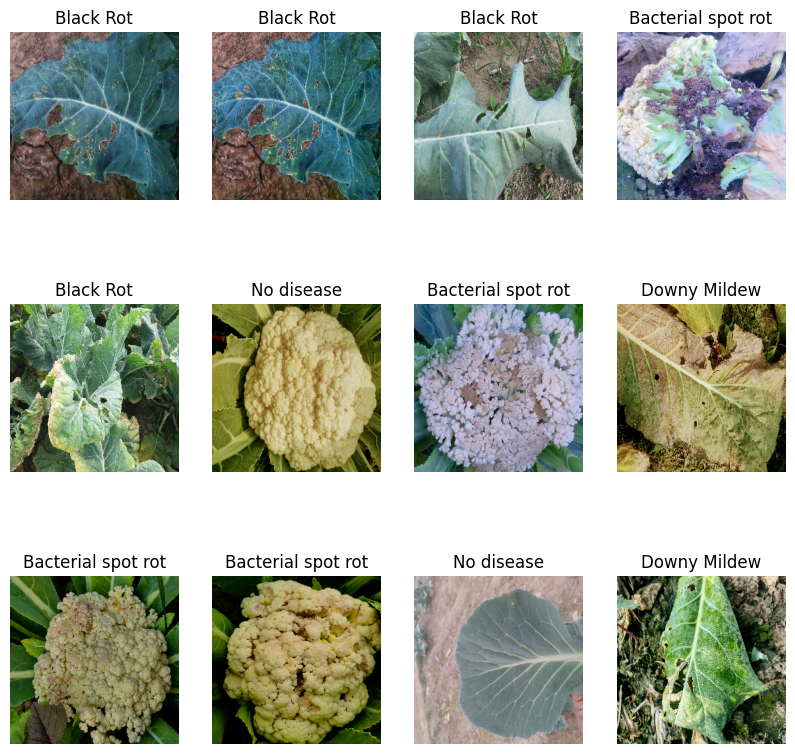

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        

In [8]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Parameters
IMAGE_SIZE = 256
BATCH_SIZE = 32

# Load full dataset
dataset = image_dataset_from_directory(
    "Original Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Calculate dataset sizes
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split dataset
train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
validation_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

print(f"Training size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")


Found 656 files belonging to 4 classes.
Training size: 16
Validation size: 2
Test size: 3


In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # Ensure splits add up to 1
    assert (train_split + val_split + test_split) == 1, "Splits must sum to 1"
    
    # Shuffle dataset if needed
    if shuffle:
        ds = ds.shuffle(shuffle_size, reshuffle_each_iteration=False)

    # Calculate the number of elements for each split
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    # Create partitions
    train_ds = ds.take(train_size)
    remaining_ds = ds.skip(train_size)
    val_ds = remaining_ds.take(val_size)
    test_ds = remaining_ds.skip(val_size)

    return train_ds, val_ds, test_ds


In [10]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

16

In [12]:
len(val_ds)


2

In [13]:
len(test_ds)


3

In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.58713233 0.658701   0.48125   ]
  [0.43553922 0.44828433 0.36583945]
  [0.48276654 0.51095283 0.4694087 ]
  ...
  [0.53186274 0.66519606 0.6691176 ]
  [0.71896446 0.8204044  0.80893075]
  [0.5135263  0.64612436 0.62026656]]

 [[0.6089767  0.7079963  0.56902575]
  [0.5251225  0.53664213 0.48088235]
  [0.34672183 0.33103552 0.2839767 ]
  ...
  [0.6319087  0.76524204 0.7691636 ]
  [0.6006434  0.7378983  0.7467218 ]
  [0.69015014 0.808655   0.8103707 ]]

 [[0.5778799  0.65621936 0.5582261 ]
  [0.4458946  0.501011   0.39906555]
  [0.428845   0.42159927 0.36095282]
  ...
  [0.57598037 0.7014706  0.752451  ]
  [0.60687804 0.7245251  0.7558977 ]
  [0.59512866 0.7285846  0.7366728 ]]

 ...

 [[0.6397059  0.7882353  0.77009803]
  [0.6349112  0.77608764 0.7682445 ]
  [0.712454   0.78745407 0.77961093]
  ...
  [0.6023131  0.7003523  0.68466604]
  [0.5869332  0.688894   0.67712927]
  [0.6078585  0.7009957  0.6774663 ]]

 [[0.68325675 0.80580574 0.79551166]
  [0.64008886 0.7812653  0.7734222 ]


In [16]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 256  # Example image size (height and width)

# Define resize and rescale preprocessing layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to desired size
    layers.Rescaling(1.0 / 255)              # Rescale pixel values to [0, 1]
])




In [17]:


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [18]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=4
model = models.Sequential([
    resize_and_rescale,  # Preprocessing layer for resizing and rescaling
    data_augmentation,   # Data augmentation layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)





C:\Users\Arpita Khobragade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [21]:
history = model.fit(
    train_ds,            # Training dataset
    validation_data=val_ds,  # Validation dataset
    verbose=1,           # Verbosity mode (1: progress bar)
    epochs=EPOCHS        # Number of epochs
)

    

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.3536 - loss: 1.3706 - val_accuracy: 0.4219 - val_loss: 1.2734
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2889 - loss: 1.3445 - val_accuracy: 0.2031 - val_loss: 1.2989
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 984ms/step - accuracy: 0.3403 - loss: 1.2985 - val_accuracy: 0.5312 - val_loss: 1.2105
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3852 - loss: 1.2383 - val_accuracy: 0.5156 - val_loss: 1.1918
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3743 - loss: 1.2819 - val_accuracy: 0.3750 - val_loss: 1.1627
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4402 - loss: 1.2238 - val_accuracy: 0.4375 - val_loss: 1.1731
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 992ms/step - accuracy: 0.5223 - loss: 1.1040 - val_accuracy: 0.6094 - val_loss: 1.1226
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6280 - loss: 0.9703 - val_accuracy: 0.59

In [22]:
scores=model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 400ms/step - accuracy: 0.9609 - loss: 0.1464


In [23]:
scores

[0.10755884647369385, 0.96875]

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
history.history['loss']

[1.3633837699890137,
 1.3331488370895386,
 1.2724518775939941,
 1.2658754587173462,
 1.297519326210022,
 1.1782525777816772,
 1.0640676021575928,
 0.9915815591812134,
 0.8924486637115479,
 0.7911310791969299,
 0.7776852250099182,
 0.6616331338882446,
 0.6326759457588196,
 0.5955597758293152,
 0.6292096972465515,
 0.5825501680374146,
 0.477337121963501,
 0.49245336651802063,
 0.4055953621864319,
 0.3943517804145813,
 0.46555402874946594,
 0.4401620924472809,
 0.2953035533428192,
 0.3681630492210388,
 0.34834787249565125,
 0.20236852765083313,
 0.23634953796863556,
 0.3442324101924896,
 0.3231213688850403,
 0.25427982211112976,
 0.2349015325307846,
 0.24774232506752014,
 0.20830751955509186,
 0.22088372707366943,
 0.21086546778678894,
 0.1436273753643036,
 0.1174064353108406,
 0.10695959627628326,
 0.20472830533981323,
 0.16530176997184753,
 0.08403874188661575,
 0.054665129631757736,
 0.08390309661626816,
 0.08796192705631256,
 0.31172677874565125,
 0.16296452283859253,
 0.1210709884762

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

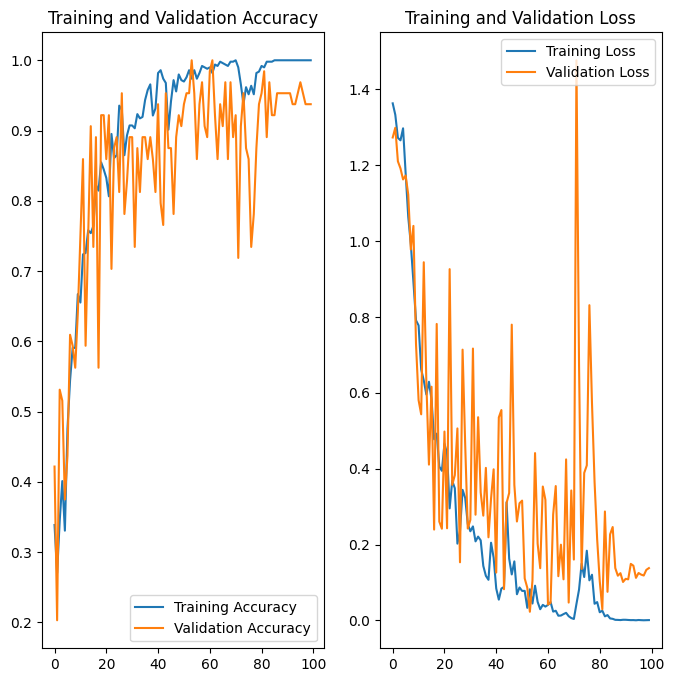

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual Label: Downy Mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
Predicted Label: Downy Mildew


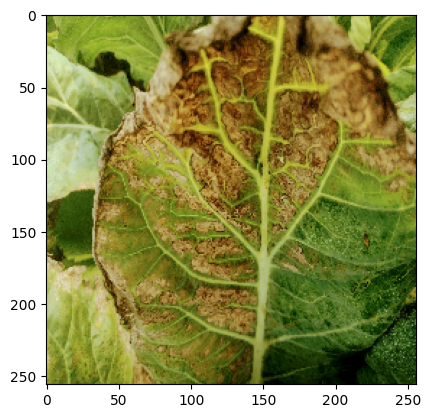

In [28]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    batch_prediction=model.predict(images_batch)   
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
    

In [29]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

        

In [39]:
import os

# Now you can use os.listdir
os.listdir("../models")


['1.keras']

In [37]:

models_version=1
model.save(f"../models.h5")

In [38]:
import os

# List files in the directory
files = os.listdir("../models")

# Filter out files that cannot be converted to integers
model_versions = [int(f.split('.')[0]) for f in files if f.split('.')[0].isdigit()]

# Add 0 to the list if necessary
model_versions.append(0)

# Now, model_versions contains valid integer versions
print(model_versions)


[1, 0]
